I used the Reddit API for this project. 

### Data Prep and Cleaning

In [1]:
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
comments_df = pd.read_csv('./comments.csv')
submissions_df = pd.read_csv('./submissions.csv')

Now we are going to take a brief look at the raw data from the api of both the comments and submissions to see if any cleaning needs to be performed

In [3]:
submissions_df.head(10)

id                                              title  \
0  176x1xq                             UCD bathrooms are wild   
1  17hw6g0             How do I bring this up to my roomates?   
2  16fc7qv  !! DOES ANYONE HAVE A FLOOR/MATTRESS I COULD S...   
3  17p9p4u  To anyone here who likes to have full on conve...   
4  16mp12l                           Thinking of dropping out   
5  17p5dpd                           Same story 8 weeks later   
6  17729ao               My contribution to the bathroom pics   
7   zdjtc6                          UCD’s complete ineptitude   
8  17ej3mr      Housemate has another person living with them   
9  17bm91m                         How to turn this thing on?   

                author   created_utc  comments_retrieved  
0      That_Bison_5628  1.697198e+09               False  
1             filmfan4  1.698437e+09               False  
2  These-Occasion-1529  1.694381e+09               False  
3    Small-Cobbler7393  1.699296e+09               False  
4         gotmyeyeonme  1.695125e+09               False  
5             Prep2023  1.699285e+09               False  
6        EsteFluffycat  1.697213e+09               False  
7         One_Book8340  1.670275e+09               False  
8             passanne  1.698064e+09               False  
9  Mountain-Willow4698  1.697730e+09               False

In [4]:
submissions_df.shape

(1000, 5)

In [5]:
comments_df.head(10)

id                                               body  \
0  k4p2aih  Love how there's actual therapy going on in th...   
1  k4pp7y3  I can’t see the mandatory; “All turds of mass ...   
2  k4pjse8  Big difference to what was inscribed on the ba...   
3  k4qbfye  Wow girls get words on the wall we get shit sm...   
4  k4qligd  The Newman toilets are next level. You always ...   
5  k4pri0r                        Deffo not the blokes anyway   
6  k4qhkyw  There’s a “pissing alone handsome?” in one of ...   
7  k4p7p31                                   How’s this wild.   
8  k4pie88             every secondary school bathroom lol 😭😭   
9  k4pxlsv  boys bathrooms; 'LESLIE TILLER WAS F\*CKING MU...   

                author   created_utc   parent_id submission_id  \
0          seafoamteal  1.697199e+09  t3_176x1xq       176x1xq   
1        First-Can3099  1.697209e+09  t3_176x1xq       176x1xq   
2           Michling99  1.697207e+09  t3_176x1xq       176x1xq   
3            Verlop451  1.697217e+09  t3_176x1xq       176x1xq   
4       LadyShadington  1.697221e+09  t3_176x1xq       176x1xq   
5         RebootKing89  1.697210e+09  t3_176x1xq       176x1xq   
6            harryeoin  1.697219e+09  t3_176x1xq       176x1xq   
7  Available_Stick9096  1.697202e+09  t3_176x1xq       176x1xq   
8     Cool-Nuggets9414  1.697206e+09  t3_176x1xq       176x1xq   
9        clumpystrusel  1.697212e+09  t3_176x1xq       176x1xq   

   tot_awards_received  ups  downs  score  
0                    0   48      0     48  
1                    0   13      0     13  
2                    0   10      0     10  
3                    0    8      0      8  
4                    0    9      0      9  
5                    0    7      0      7  
6                    0    8      0      8  
7                    0    4      0      4  
8                    0    3      0      3  
9                    0    3      0      3

In [6]:
comments_df.shape

(5638, 10)

As part of the collection process, if author's name's were missing, we added name = None in case the author's name had been removed from the post in order to prevent error's in collecting data. So we can now check how many missing author's names from both the submissions and the comments are within the data. 

In [7]:
submissions_df.isnull().sum()

id                     0
title                  0
author                23
created_utc            0
comments_retrieved     0
dtype: int64

In [8]:
sub_df = submissions_df.dropna()

In [9]:
sub_df.isnull().sum()

id                    0
title                 0
author                0
created_utc           0
comments_retrieved    0
dtype: int64

In [10]:
comments_df.isnull().sum()

id                       0
body                     0
author                 314
created_utc              0
parent_id                0
submission_id            0
tot_awards_received      0
ups                      0
downs                    0
score                    0
dtype: int64

In [11]:
com_df = comments_df.dropna()

In [12]:
com_df.isnull().sum()

id                     0
body                   0
author                 0
created_utc            0
parent_id              0
submission_id          0
tot_awards_received    0
ups                    0
downs                  0
score                  0
dtype: int64

Because it also appears the column "tot_awards_received" and "downs" may all have the same value of 0, let's check to see if that is true. If so, we can "clean" our data by removing these columns.

In [13]:
com_df[com_df['tot_awards_received'] != 0]

Empty DataFrame
Columns: [id, body, author, created_utc, parent_id, submission_id, tot_awards_received, ups, downs, score]
Index: []

In [14]:
com_df[com_df['downs'] != 0]

Empty DataFrame
Columns: [id, body, author, created_utc, parent_id, submission_id, tot_awards_received, ups, downs, score]
Index: []

Also, let's check if the "ups" value is always equal to the "score" value. If so, than we can remove the "ups" column as it is just giving the same value as the "score" value.

In [15]:
com_df[com_df['ups'] != com_df['score']]

Empty DataFrame
Columns: [id, body, author, created_utc, parent_id, submission_id, tot_awards_received, ups, downs, score]
Index: []

In [16]:
new_com = com_df.drop(['tot_awards_received','downs',"ups"], axis=1) 
new_com.head()

id                                               body          author  \
0  k4p2aih  Love how there's actual therapy going on in th...     seafoamteal   
1  k4pp7y3  I can’t see the mandatory; “All turds of mass ...   First-Can3099   
2  k4pjse8  Big difference to what was inscribed on the ba...      Michling99   
3  k4qbfye  Wow girls get words on the wall we get shit sm...       Verlop451   
4  k4qligd  The Newman toilets are next level. You always ...  LadyShadington   

    created_utc   parent_id submission_id  score  
0  1.697199e+09  t3_176x1xq       176x1xq     48  
1  1.697209e+09  t3_176x1xq       176x1xq     13  
2  1.697207e+09  t3_176x1xq       176x1xq     10  
3  1.697217e+09  t3_176x1xq       176x1xq      8  
4  1.697221e+09  t3_176x1xq       176x1xq      9

### Data Characterization, Summarization, and Analysis

Now that we have cleaned up some of the comments data we had been working with, we can take a premelinear look into the network of the comments. We can set up our network with the nodes being defined by the "authors" of a post and the "parent_id" as whom the node it is linked. 

Useing the edge list function from networkx allows for the creation of the nodes and the edges at the same time by defining the source and the target. We can also make it a directed graph by applying the nx.DiGraph

In [17]:
g = nx.from_pandas_edgelist(new_com, source="author", target="parent_id", create_using=nx.DiGraph)

We can now do some analyis by creating a new dataframe that can measure a few basic network dimensions of our graph, such as the degree and differing centrality measures using networkx. These measures, such as degree or degree centrality, are used within social network analysis to understand the different levels of "social" or "network" capital that individuals may have, due to where they "sit" within the network and with whom different individuals may be connected to. More information can be found in Networks(Newman, 2018). 

In [18]:
net_com_df = pd.DataFrame(dict(
    DEGREE = dict(g.degree),
    DEGREE_CENTRALITY = nx.degree_centrality(g),
    EIGENVECTOR = nx.eigenvector_centrality(g),
    KATZ = nx.katz_centrality_numpy(g),
    CLOSENESS_CENTRALITY = nx.closeness_centrality(g),
)) 

In [19]:
net_com_df.sort_values("DEGREE", ascending=False)

DEGREE  DEGREE_CENTRALITY  EIGENVECTOR      KATZ  \
Puzzleheaded_Try4456     198           0.041130     0.000074  0.012634   
grxinnef                 107           0.022227     0.000074  0.012634   
t3_16mp12l                91           0.018903     0.452205  0.127604   
t3_17hw6g0                88           0.018280     0.437300  0.123814   
Negative-Message-447      74           0.015372     0.000074  0.012634   
...                      ...                ...          ...       ...   
t1_izueq1k                 1           0.000208     0.005043  0.013897   
ein125                     1           0.000208     0.000074  0.012634   
quirky-turtle-12           1           0.000208     0.000074  0.012634   
t1_k74o1me                 1           0.000208     0.005043  0.013897   
RL_Folst                   1           0.000208     0.000074  0.012634   

                      CLOSENESS_CENTRALITY  
Puzzleheaded_Try4456              0.000000  
grxinnef                          0.000000  
t3_16mp12l                        0.018903  
t3_17hw6g0                        0.018280  
Negative-Message-447              0.000000  
...                                    ...  
t1_izueq1k                        0.000208  
ein125                            0.000000  
quirky-turtle-12                  0.000000  
t1_k74o1me                        0.000208  
RL_Folst                          0.000000  

[4815 rows x 5 columns]

We can take a preliminary look at some of the statitics of the network data

In [20]:
net_com_df.describe()

DEGREE  DEGREE_CENTRALITY  EIGENVECTOR         KATZ  \
count  4815.000000        4815.000000  4815.000000  4815.000000   
mean      2.173209           0.000451     0.005473     0.014007   
std       5.042930           0.001048     0.013333     0.003390   
min       1.000000           0.000208     0.000074     0.012634   
25%       1.000000           0.000208     0.000074     0.012634   
50%       1.000000           0.000208     0.005043     0.013897   
75%       2.000000           0.000415     0.005043     0.013897   
max     198.000000           0.041130     0.452205     0.127604   

       CLOSENESS_CENTRALITY  
count           4815.000000  
mean               0.000226  
std                0.000557  
min                0.000000  
25%                0.000000  
50%                0.000208  
75%                0.000208  
max                0.018903

As we can see from looking at the max and not just the mean, but the 75% percentile as well, this composition of data is not normal, but highly skewed.

Let's take a closer look visually at the distribution of the network

Text(0.5, 1.0, 'Degree Distribution')

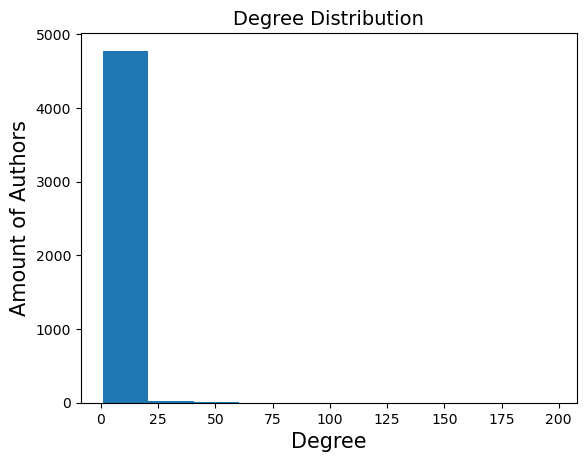

In [21]:
plt.hist([v for k,v in nx.degree(g)])
plt.xlabel("Degree", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Degree Distribution", fontsize=14)

Text(0.5, 1.0, 'Degree Centrality Distribution')

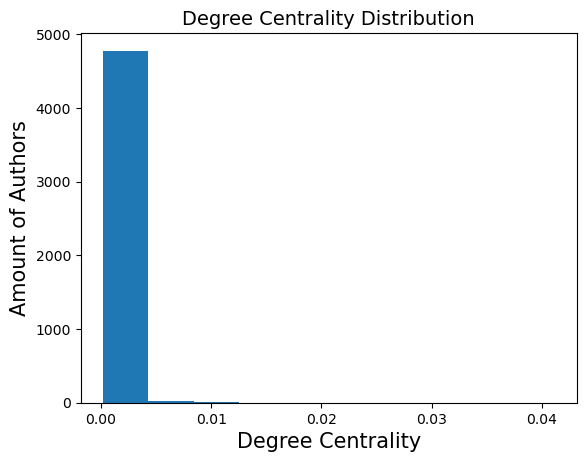

In [22]:
plt.hist(nx.centrality.degree_centrality(g).values())
plt.xlabel("Degree Centrality", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Degree Centrality Distribution", fontsize=14)

Text(0.5, 1.0, 'Closeness Centrality Distribution')

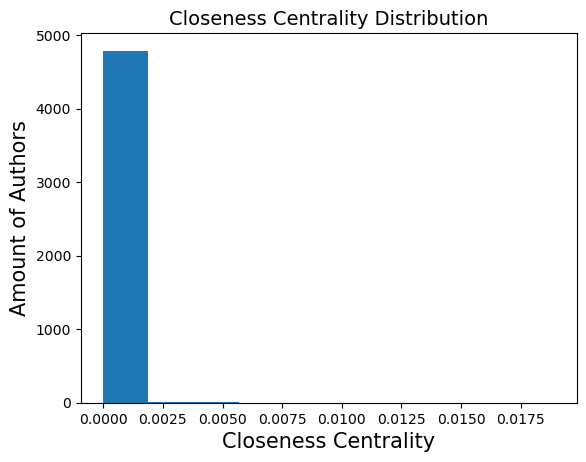

In [23]:
plt.hist(nx.centrality.closeness_centrality(g).values())
plt.xlabel("Closeness Centrality", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Closeness Centrality Distribution", fontsize=14)

So it appears the comments network is super skewed with most people having a low degree, meaning that most people are not "well connected" and do not comment on lots of other peoples posts, but a small few having a high degree, meaning that there a few individuals that are better connected within this comments network and comment on a variety of different comments more frequently. 

And it also appears that this network is not connected, as the closeness centrality is very low for almost all the nodes. This makes sense as this would require a person or group of people to attempt to comment on submissions on almost every topic in UCD Reddit, which could take a lot of effort for a subreddit. 

Let's take a look at visually what the network looks like, again with the nodes being the authors of a comment and the edges being whom the comment was directed towards. 

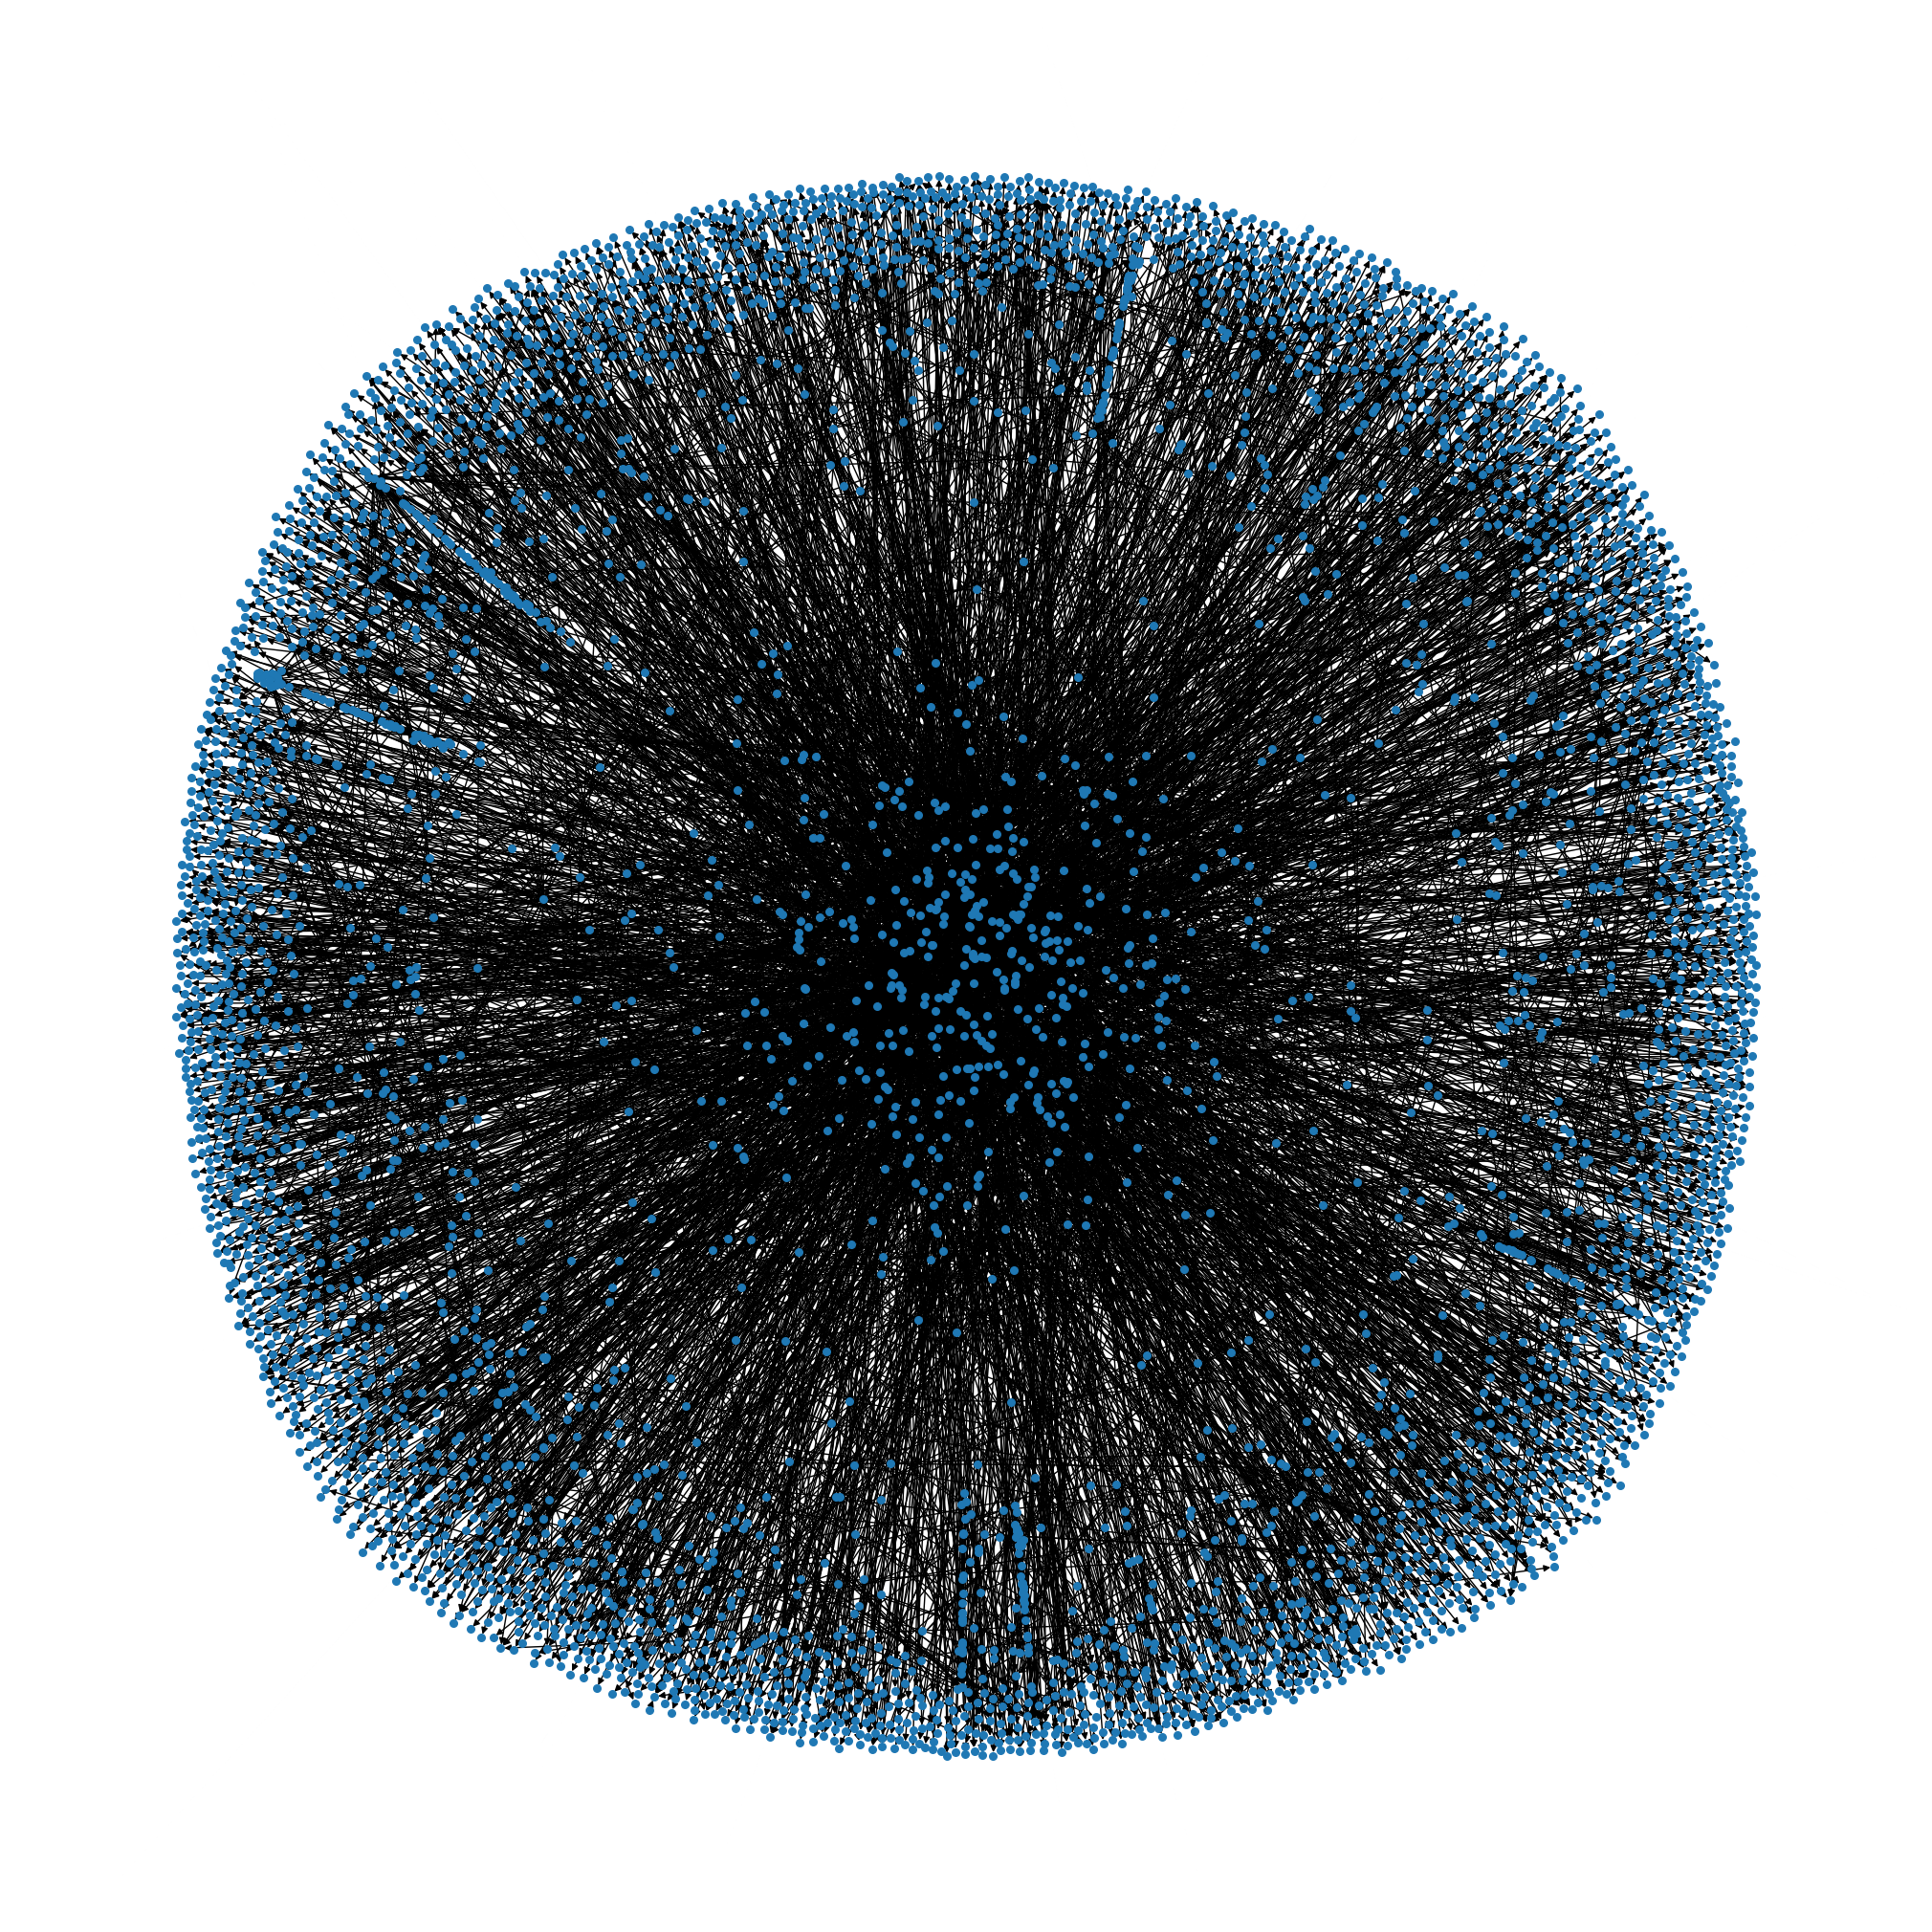

In [24]:
fig = plt.figure(figsize=(20,20))
nx.draw(g, node_size=30)
plt.axis('equal')
plt.show()

Wow, this network is quite large. Drawing this graph via nx.draw allows for us to visually see the network. Networkx places those nodes with the greater amount of connections focused in the inside, with those least connected on the outside. As we had already seen looking at the degree and the centrality distributions, the network is quite large and quite skewed, following similar distributions in many real world social networks. 

Now let's shift our focus at the submission network that represents those who have posted a topic on the UCD reddit. 

In [25]:
s = nx.from_pandas_edgelist(sub_df, source="author", target="id", create_using=nx.DiGraph)

In [26]:
net_sub_df = pd.DataFrame(dict(
    DEGREE = dict(s.degree),
    DEGREE_CENTRALITY = nx.degree_centrality(s),
    EIGENVECTOR = nx.eigenvector_centrality(s, max_iter=600),##here we use the max_iteration argument as it's default value is 100, which for this measure fails to converge
    KATZ = nx.katz_centrality_numpy(s),
    CLOSENESS_CENTRALITY = nx.closeness_centrality(s),
)) 

In [27]:
net_sub_df.sort_values("DEGREE", ascending=False)

DEGREE  DEGREE_CENTRALITY  EIGENVECTOR      KATZ  \
asoundusername            17           0.010712     0.000286  0.023615   
Individual-Poet4376       12           0.007561     0.000286  0.023615   
Odd_Metal2215             11           0.006931     0.000286  0.023615   
daylight08365             10           0.006301     0.000286  0.023615   
Quirky-Recording-226       8           0.005041     0.000286  0.023615   
...                      ...                ...          ...       ...   
Wakon123                   1           0.000630     0.000286  0.023615   
13vqjlz                    1           0.000630     0.031992  0.025977   
143przg                    1           0.000630     0.031992  0.025977   
Elegant_Ad_7725            1           0.000630     0.000286  0.023615   
1659nea                    1           0.000630     0.031992  0.025977   

                      CLOSENESS_CENTRALITY  
asoundusername                     0.00000  
Individual-Poet4376                0.00000  
Odd_Metal2215                      0.00000  
daylight08365                      0.00000  
Quirky-Recording-226               0.00000  
...                                    ...  
Wakon123                           0.00000  
13vqjlz                            0.00063  
143przg                            0.00063  
Elegant_Ad_7725                    0.00000  
1659nea                            0.00063  

[1588 rows x 5 columns]

In [28]:
net_sub_df.describe()

DEGREE  DEGREE_CENTRALITY  EIGENVECTOR         KATZ  \
count  1588.000000        1588.000000  1588.000000  1588.000000   
mean      1.230479           0.000775     0.019793     0.025068   
std       0.937776           0.000591     0.015431     0.001149   
min       1.000000           0.000630     0.000286     0.023615   
25%       1.000000           0.000630     0.000286     0.023615   
50%       1.000000           0.000630     0.031992     0.025977   
75%       1.000000           0.000630     0.031992     0.025977   
max      17.000000           0.010712     0.031992     0.025977   

       CLOSENESS_CENTRALITY  
count           1588.000000  
mean               0.000388  
std                0.000307  
min                0.000000  
25%                0.000000  
50%                0.000630  
75%                0.000630  
max                0.000630

As we can see, the difference between the mean and the max of submission data is less drastic than the comment data, but still appears to be skewed. However, we can take a look again at a few of the same distributions.

Text(0.5, 1.0, 'Degree Distribution')

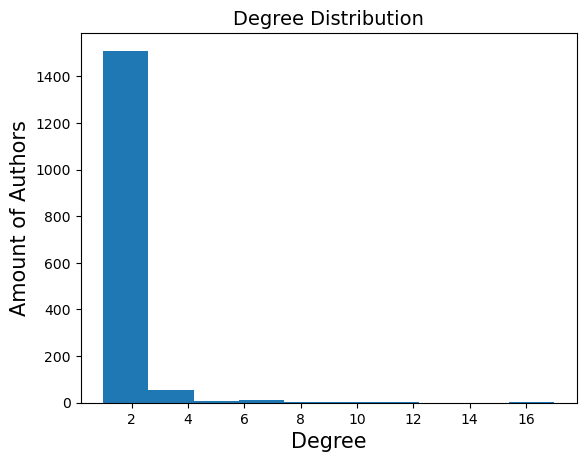

In [29]:
plt.hist([v for k,v in nx.degree(s)])
plt.xlabel("Degree", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Degree Distribution", fontsize=14)

Text(0.5, 1.0, 'Degree Centrality Distribution')

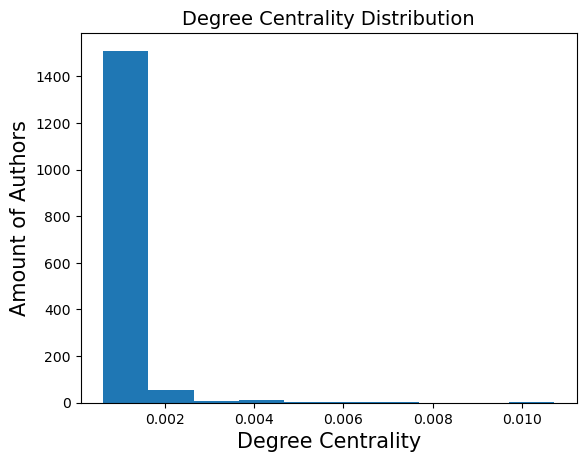

In [30]:
plt.hist(nx.centrality.degree_centrality(s).values())
plt.xlabel("Degree Centrality", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Degree Centrality Distribution", fontsize=14)

Now let's visualize what the network looks like

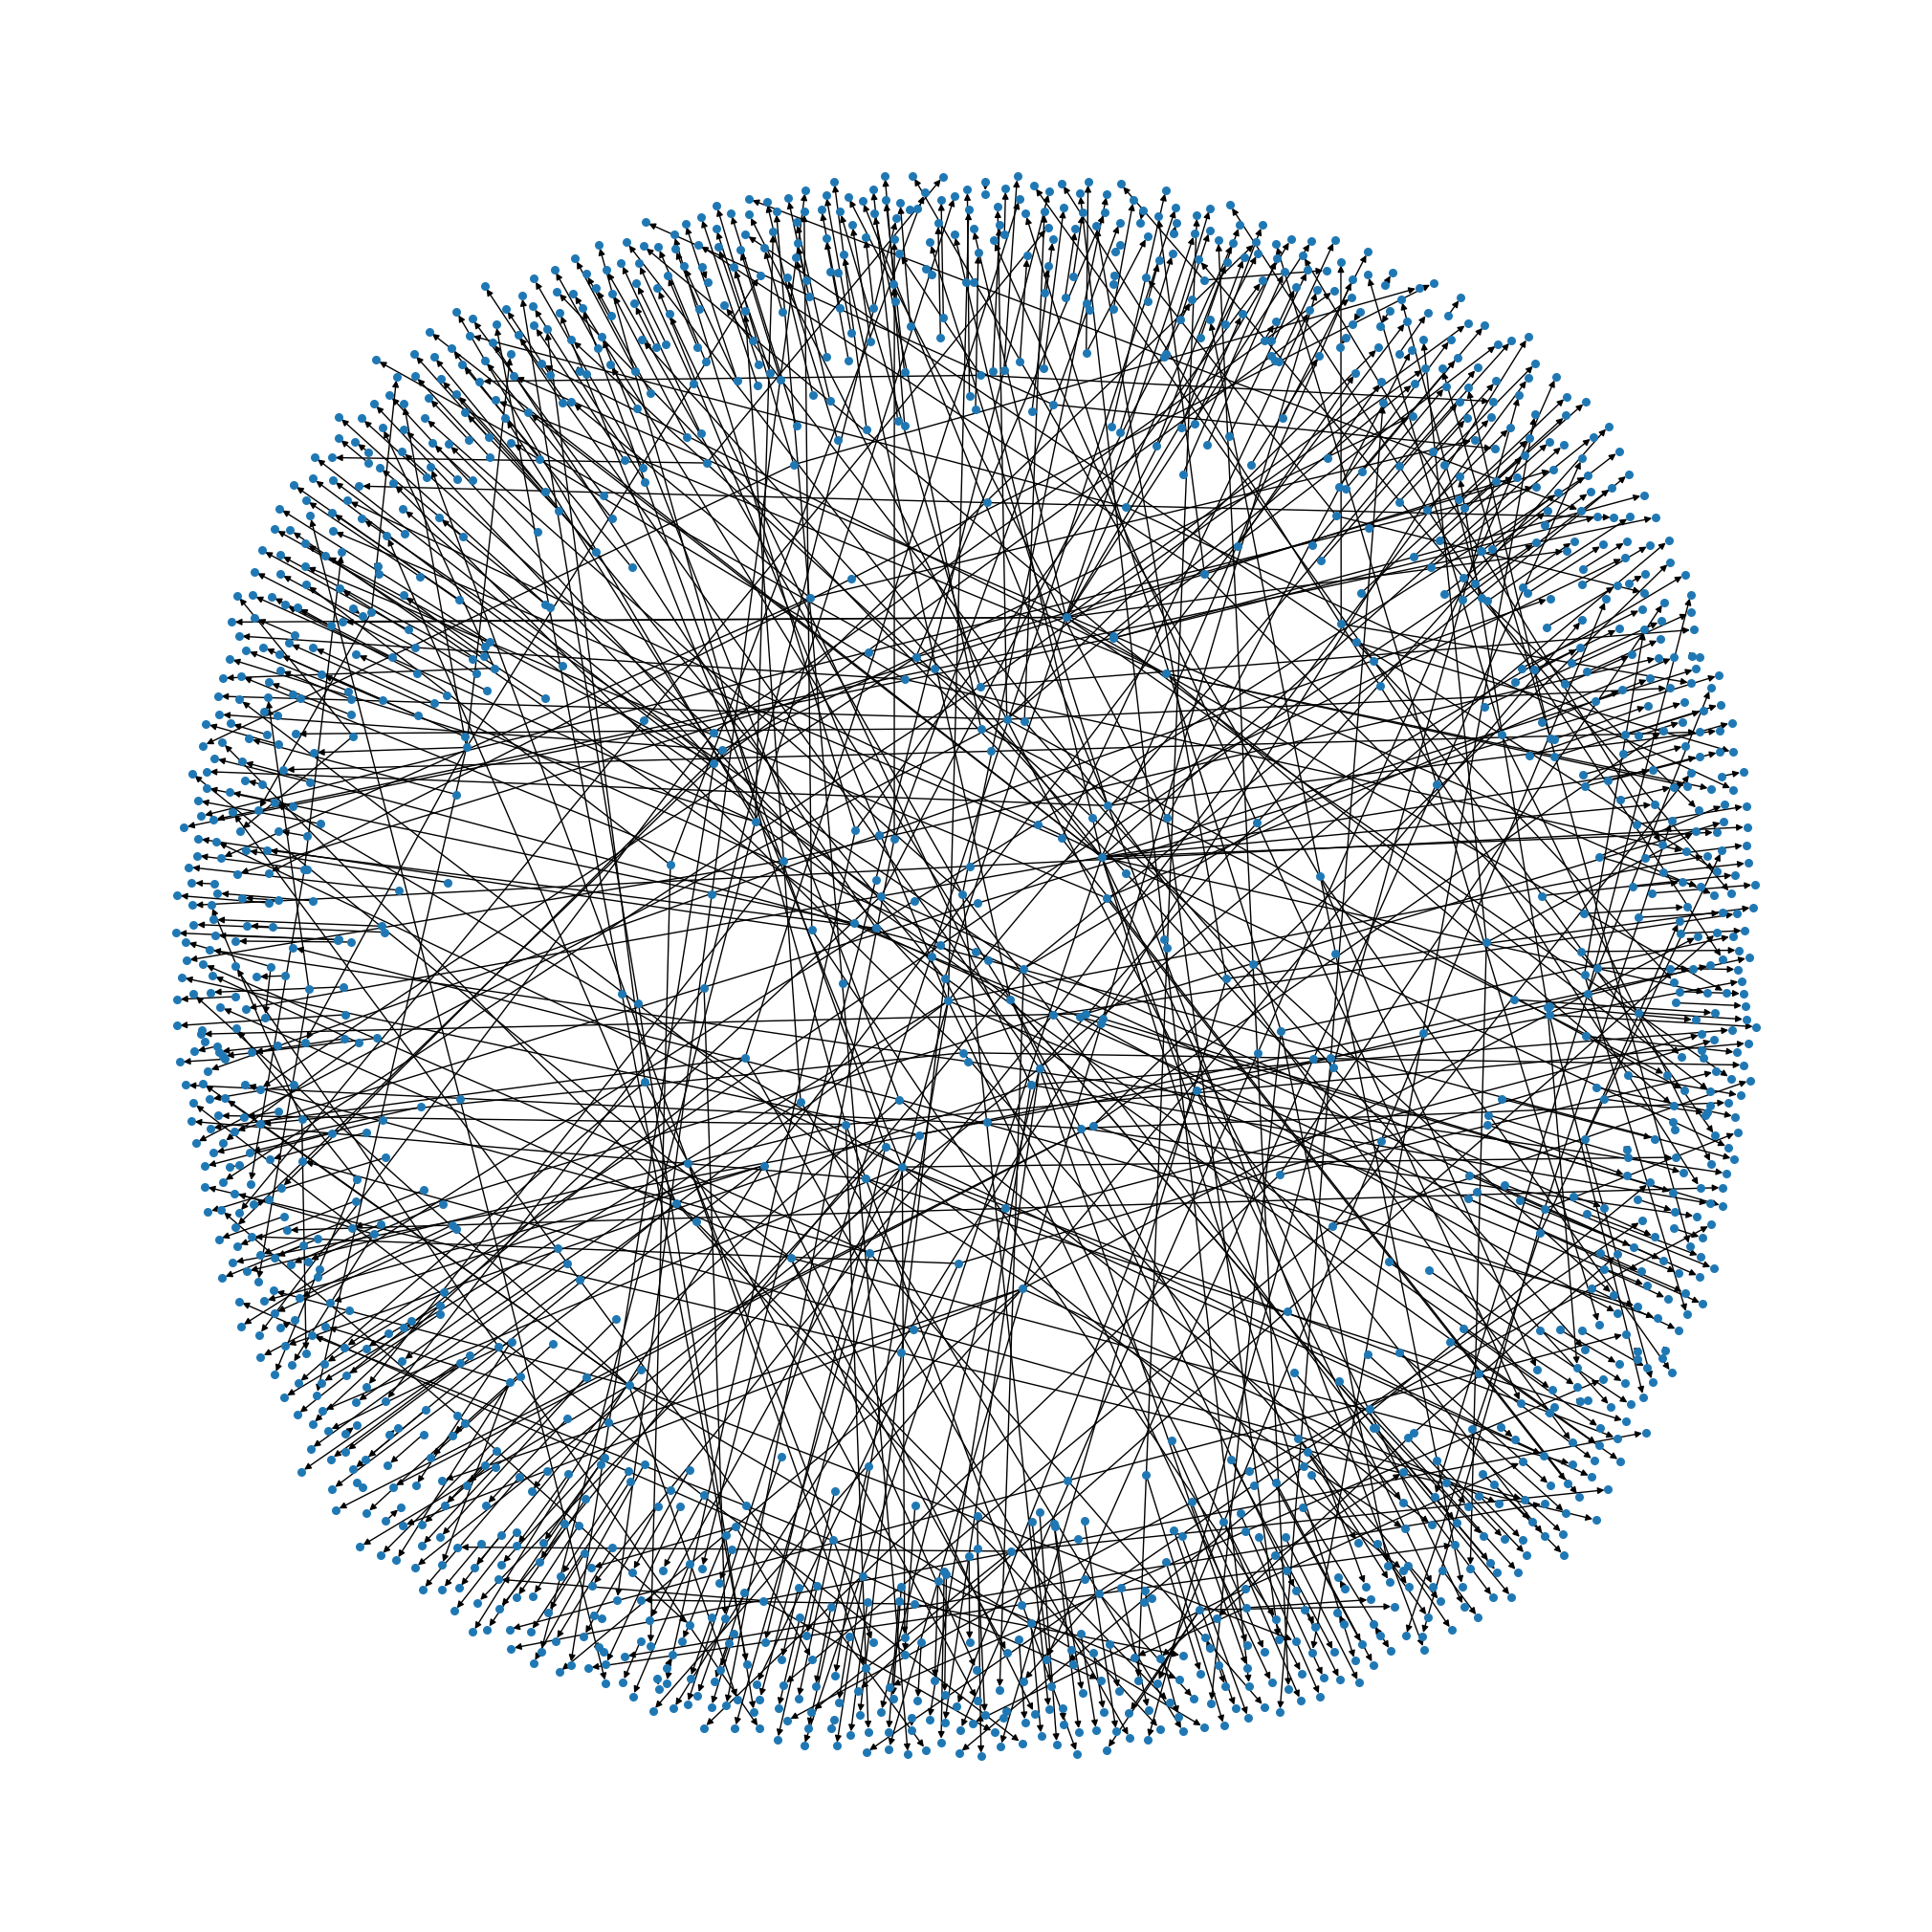

In [31]:
fig = plt.figure(figsize=(20,20))
nx.draw(s, node_size=30)
plt.axis('equal')
plt.show()

With this many nodes and edges within the data, especially the comments data, networkx may not be the best way to visualize the network. The Gephi application may be a better tool as it can allow for us to better handle large networks and use the time data we have stored within our dataframes, creating a dynamic graph (which networkx does not allow for). It can also better represent bipartite networks to create a better visual representation, as this may be a better way to represent the the submission network, as the submission network nodes can both represents those who author a submission, and the submission itself.

Thus, we can write out both our comments data and our submissions data to csv files. As csv is one of the two types of file that works best for loading data into Gephi, this can be our best option. Importantly, we are still keeping in the text for both the submission and the comments, in case one wants to also perform discourse network analysis on the data, this will keep what was actually said in UCD Subreddit.

In [32]:
new_com.to_csv('./cleaned_comments_data.csv', index=False)

In [33]:
sub_df.to_csv('./cleaned_submission_data.csv', index=False)

However, our journey is not over yet. We still can take a look at the data from comments and the submissions and see what we may gleam by looking into the number of posts, the number of comments, and the "amount they had to say" in the comments of those in UCD reddit by merging our two cleaned dataframes. To understand the "amount they had to say", we can count the amount of strings within the text of the comment body and add that as a new variable.

In [34]:
new_com['comment_length'] = new_com.body.str.len()

We can use the groupby function to collect both the comment data and the submission data. For the comment data, we want to include the number of comments, the average comment length per person, and the average score the person would recieve. For the submissions data, as we do not have a comment length or a score, we can group by the number of posts that someone made.

In [35]:
commenter_stats = new_com.groupby('author').agg(
    num_comments = ('id', 'count'),
    median_comment_length = ('comment_length', 'median'),
    median_score = ('score', 'median'),
).reset_index()

In [36]:
submitter_stats = sub_df.groupby('author').agg(
    num_posts = ('id', 'count')
).reset_index()

Now we can merge these two based upon the author.

In [37]:
sub_com = pd.merge(commenter_stats, submitter_stats, on='author')

now we can take a look at the distribution of the merged data, including the amount of posts and the amount of comments

Text(0.5, 1.0, 'Posts within UCD Reddit')

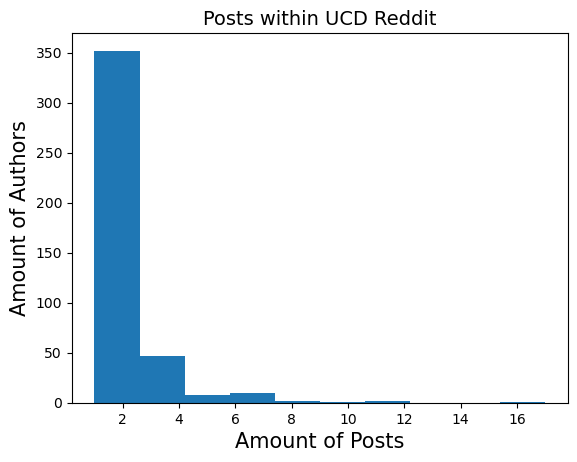

In [38]:
plt.hist(sub_com['num_posts'])
plt.xlabel("Amount of Posts", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Posts within UCD Reddit", fontsize=14)

Text(0.5, 1.0, 'Comments within UCD Reddit')

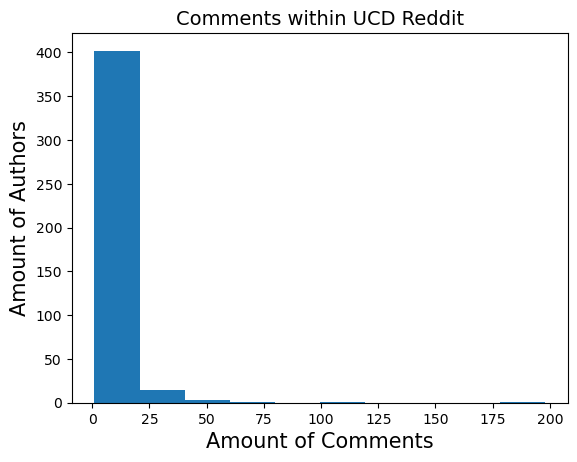

In [39]:
plt.hist(sub_com['num_comments'])
plt.xlabel("Amount of Comments", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Comments within UCD Reddit", fontsize=14)

The amount of comments and posts appear to be similar in distribution to many small world, scale free networks that are common in many social networks. While this may not be surprising that UCD Redditt has similar properties to other small world, scale free networks, it is important to note that this does match with our earlier data in which we saw similar distributions within the networks of both the comment data and the submissions data. 

We have not taken a look at the the distribution of the comment length. Let's take a look at that before we dive further into our analysis.

Text(0.5, 1.0, "Post's within UCD Reddit")

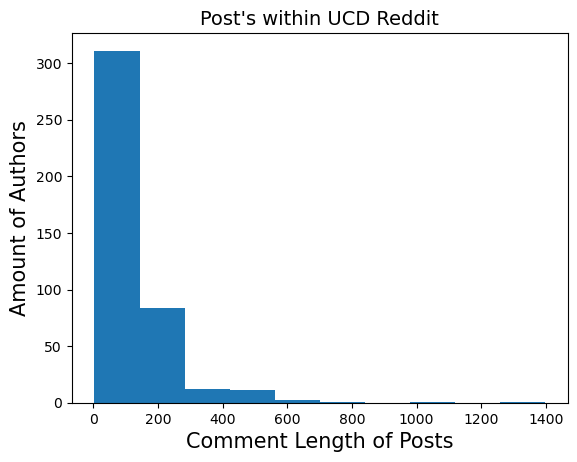

In [40]:
plt.hist(sub_com['median_comment_length'])
plt.xlabel("Comment Length of Posts", fontsize=15)
plt.ylabel("Amount of Authors", fontsize=15)
plt.title("Post's within UCD Reddit", fontsize=14)

One question that we can ask is if someone comments longer, does this mean that they may be more likely to comment on other posts? Are they more comfortable in writing a lot and so are more comfortable to make more comments? Because the comment length and the number of comments are both so skewed, we can take the log of the length of comments, as well as the number of comments to see if there is a relationship between the two. 

While we do this, we can create a regression line to see what the relation between the comment length and the number of comments someone has.

In [41]:
model = LinearRegression()

X = np.log(sub_com[['median_comment_length']].values)
Y = np.log(sub_com[['num_comments']].values)
M = model.fit(X, Y)

Text(0.5, 1.0, "Post's within UCD Reddit")

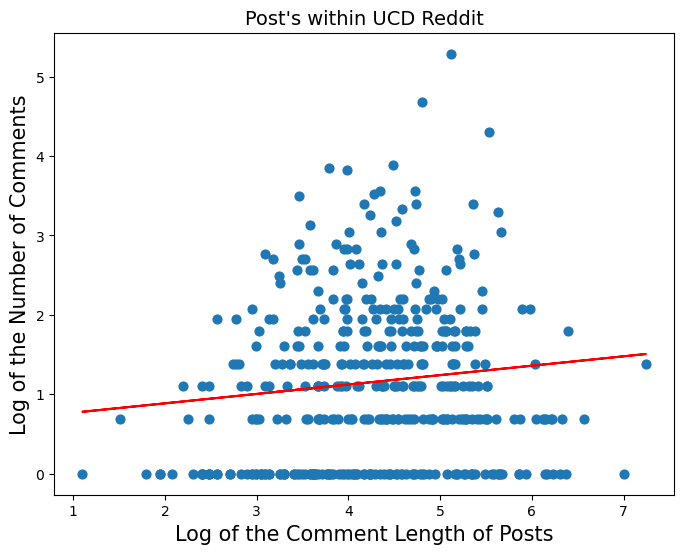

In [42]:
plt.figure(figsize=(8,6) )
# set up the scatter plot
p = plt.scatter(X, Y, s=40)
plt.plot(X, model.predict(X), color="red")
plt.xlabel("Log of the Comment Length of Posts", fontsize=15)
plt.ylabel("Log of the Number of Comments", fontsize=15)
plt.title("Post's within UCD Reddit", fontsize=14)

It appears that there is very little relationship between how often someone comments and the length of the posts. This linear model suggest that the longer the comments, on average the more often this person will comments in the UCD Reddit...but only marginally. 

However, we did not split our data to train the model. This model then may not be the most conclusive, may not represent the relationship, and can be overfit to our data. 

Thus, to get further insigths, instead of taking the log of our values, we can also normalize our data, as we have seen in 18-Intro to Classification, which will include both the comment length and the score to see the relation between the two variables.

We can also use the linear regression from sklearn that was used in 17-Linear Regression, as we did previously, but this time with the data split via a training and testing split.

In [43]:
data = sub_com[["num_comments",'median_comment_length',"median_score","num_posts"]]

In [44]:
normalizer = MinMaxScaler().set_output(transform = "pandas")
data_scaled = normalizer.fit_transform(data)
data_scaled

num_comments  median_comment_length  median_score  num_posts
0        0.015228               0.015407           0.2     0.0000
1        0.040609               0.093873           0.2     0.0000
2        0.005076               0.015765           0.2     0.0000
3        0.010152               0.041562           0.2     0.0000
4        0.081218               0.078108           0.2     0.0000
..            ...                    ...           ...        ...
418      0.000000               0.008599           0.2     0.0000
419      0.000000               0.002866           0.2     0.0000
420      0.000000               0.012899           0.2     0.0000
421      0.000000               0.037263           0.2     0.0000
422      0.000000               0.030813           0.2     0.0625

[423 rows x 4 columns]

Before we start to build our model, we can to a preliminary check to see how the data is correlated. We can do this to check for the relationship between the two variable of comment length and number of comments. 

In [45]:
data_scaled.corr()

num_comments  median_comment_length  median_score  \
num_comments               1.000000              -0.004743     -0.034198   
median_comment_length     -0.004743               1.000000      0.241515   
median_score              -0.034198               0.241515      1.000000   
num_posts                  0.210331              -0.082391     -0.062109   

                       num_posts  
num_comments            0.210331  
median_comment_length  -0.082391  
median_score           -0.062109  
num_posts               1.000000

There appears to be little corelation between the comment length and the number of comments.

However, as we can see there is a slight correlation between median_comment_length and median score. We can create a model to try to predict the score based off of the comment length. 

Thus, we can switch our attention to creating a model for predicting the median score based off of the median comment length. 

Here we will train a linear regression model on 60% of our data and save 40% for testing.

In [46]:
x = data_scaled[["median_comment_length"]].values
y = data_scaled[["median_score"]]
data_train, data_test, target_train, target_test = train_test_split(x, y, test_size = 0.4)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 253 examples
Test set has 170 examples


In [47]:
model = LinearRegression()
mod = model.fit(data_train, target_train)

Let's take a look at the slope of the model and see if there is a strong positive or negative correlation both

In [48]:
print("Model intercept is %.4f" % model.intercept_)
print("Model slope is %.4f" % model.coef_[0])

Model intercept is 0.2145
Model slope is 0.2181


Let's test how good our linear model is by finding the mean squared error

In [49]:
predictions = model.predict(data_test)
predictions

array([[0.23352709],
       [0.21774089],
       [0.24259244],
       [0.2318078 ],
       [0.26580286],
       [0.21469305],
       [0.21867868],
       [0.21899128],
       [0.22961962],
       [0.2406387 ],
       [0.22211726],
       [0.22047612],
       [0.22008537],
       [0.22836922],
       [0.26853809],
       [0.21938203],
       [0.22242986],
       [0.21680309],
       [0.22602474],
       [0.22883812],
       [0.22930702],
       [0.23860681],
       [0.21641234],
       [0.22016352],
       [0.23884126],
       [0.24415543],
       [0.22196096],
       [0.22680623],
       [0.22141391],
       [0.23884126],
       [0.22242986],
       [0.22203911],
       [0.2150838 ],
       [0.28010422],
       [0.25071999],
       [0.22633734],
       [0.2329019 ],
       [0.21820978],
       [0.22164836],
       [0.22211726],
       [0.21961647],
       [0.23860681],
       [0.26963218],
       [0.22571214],
       [0.23618418],
       [0.24118575],
       [0.22758773],
       [0.287

In [50]:
mse = mean_squared_error(target_test, predictions)
print("MSE=%.2f" % mse)

MSE=0.01


As we have a low mean squared error, this model appears to be a good fit...too good of a fit and may be overfit for our data. 

However, let's take a look at what this relationship looks like visually by adding in the model's linear regression line to our data.

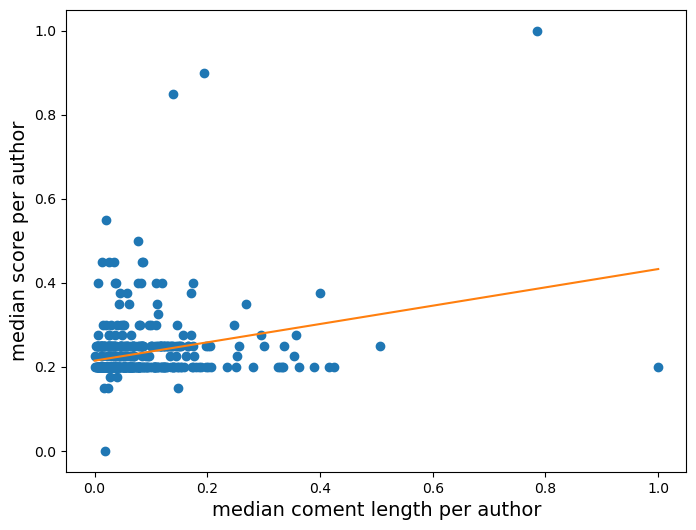

In [51]:
X_fit = np.linspace(0, 1, 100)[:, np.newaxis]
y_fit = model.predict(X_fit)
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o')
plt.plot(X_fit, y_fit)
plt.xlabel("median coment length per author", fontsize=14)
plt.ylabel("median score per author", fontsize=14);

As we can see, there is not that strong of a drastic positive relationship between the amount someone writes in a comments and the score that they will recieve. Maybe it will go up slightly by the amount someone writes, but, as one can easily imagine, a person cannot just increase their comment length drasticaly to get a drastic better score/ie the more upvotes one can recieve with the least downvotes on a particular comment.

### Discussion

In completing this project, there were a few challenges that were difficult to face, both in the colllection of the data via the Reddit api and in the cleaning and analysis of the data. 

I wanted to learn how to use wrappers when accessing API's, and so I chose to use the PRAW wrapper. However, one of the problem I had with using this wrapper was retrieving the data as a list. The PRAW wrapper returns the data from the api call for comments as lists instead of in a json format with objects or arrays for all the comments in the "comment forrest", and as I was most interested in looking into comments and the social network analysis of the UCD Subreddit, I chose to just use this method of lists and wrote it into a csv. This allowed me to gain all the comments for each of the submissions to a particular topic. But I think it probably would have been better if it was returned in json format, however, I struggled to figure out how to do that with the PRAW wrapper. 

Another problem I faced was in making sure to create the "save game" function or a "starting point" when I would get an error message of too many calls a portion of the way through making calls to the Reddit Api. By just adding in the command to convert from false to true and to require the collection of only collecting from submissions that have the value of false, when I got an error message, I could re-run the cell and not re-collect all the previous data, but instead continue on with "where I had left off". 

In the cleaning and analysis portion, I knew I wanted to do a bit of social network analysis, however I have not used the networkx in python before. This was a bit of a challenge to learn and it did not seem to best visually represent networks, such as a program like Gephi can. I struggled with making an image of the network that could visually display some of the dynamics that were at play, such as changing the size of the node based on it's degree. If I did this, then the network image had a few rather large nodes, and too many tiny nodes to place. The edges in the image of the network were also too large and made it difficult to see the different connections between the nodes. 

However, using Networkx was quite helpful in displaying some of the distribution of the networks. They both followed many real world social networks, and so finding that their were a few individuals who had a greater amount of degree or degree centrality was beneficial. This is quite important as it can give some key indicators in which individuals had this amount of degree centrality and that these indivuals may hold greater amount of influence within within the UCD Subreddit. This is quite important in future study, as will be discussed below. Also, being able to perform linear regression tests on the data between the length of the comment and the score was beneficial because as a social scientist, it would not hold too much weight in different aspects of social theory if the relationships in the network were only determined by how many words someone could write. Importantly, it was beneficial to see that there was not a strong correlation in general between the amount of comments, the length of the comments, the amount of posts, and the score. This allows for the future study of the network to relate more towards discourse network analysis. In this way, the data collected and already analyzed can play a vital role in addressing which content of which actors may be best to spend more time in the qualitative analysis of the discourse, while at the same time giving some of the quantitative data of the centrality measures to the future researchers. 

In the methodology of discourse network analyis, a simplified approach is one in which a person applies both discourse analysis to the content of a text as well as network analysis who made the content and whom it was directed towards. If this approach is taken, both the comments and submission text are preserved in the cleaned data that was saved as a csv. One component that should be mentioned to the further researchers is that, when getting the data from the Reddit API, I requested in my call to include the upvotes, the downvotes, the total amount of awards, and the overall score of a comment. These are all indicators of social reward/approval or punishment/disapproval. This could have been quite supportive and better indicators of how comments were viewed, instead of just an overall score. However, I noticed when beginning the cleaning processes that the downvotes and the total amount of rewards were all 0. Also, the upvotes had negative values and perfectly matched the score, and so I believe that it may be hard to get a social signal from a comment; if a particuler comment may have gotten 12 upvotes and 10 downvotes, it could have only a score of 2, but been an important comment that recieved both positive and negative views from others. Thus, when future researchers may be using the cleaned data, the measurement value of the score may is an aggregate score of both the positive and negative ratings and this should be taken into consideration. 

